In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Easy

Скачать данные отсюда (кнопка download all снизу): https://www.kaggle.com/c/titanic/data Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл


In [2]:
df = pd.read_csv(r'C:\Users\marti\Desktop\Домашки\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посчитать процент детей (младше 18 лет)

In [4]:
df[df['Age'] < 18].count()['PassengerId'] / len(df.index) * 100

12.682379349046016

Соотношение мужчин/женщин на борту

In [5]:
df[df['Sex'] == 'male'].count()['PassengerId'] / df[df['Sex'] == 'female'].count()['PassengerId']

1.8375796178343948

# Normal

Посчитать по скольким людям нет информации (пола или возраста)

In [6]:
df[['Sex', 'Age']].isnull().sum(axis = 0)

Sex      0
Age    177
dtype: int64

Вывести гистограмму по возрасту пассажиров

<AxesSubplot:xlabel='Age', ylabel='Count'>

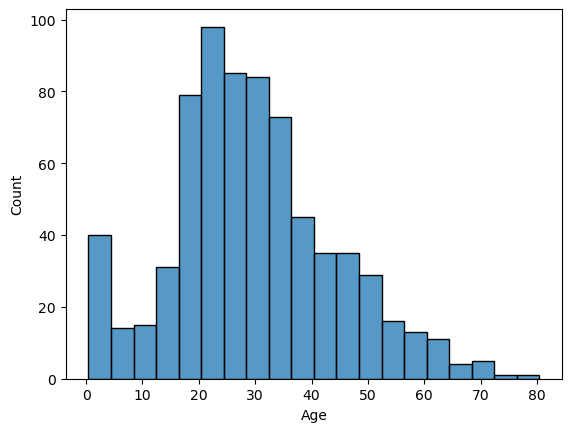

In [7]:
sns.histplot(df['Age'], binwidth=4)

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.

In [8]:
#процент выживших мужчин
df[(df.Survived == 1) & (df.Age >= 18) & (df.Sex == 'male')].count()['PassengerId'] / df[(df.Age >= 18) & (df.Sex == 'male')].count()['PassengerId'] * 100

17.72151898734177

In [9]:
#процент выживших женщин
df[(df.Survived == 1) & (df.Age >= 18) & (df.Sex == 'female')].count()['PassengerId'] / df[(df.Age >= 18) & (df.Sex == 'female')].count()['PassengerId'] * 100

77.18446601941747

In [10]:
#процент выживших детей
df[(df.Survived == 1) & (df.Age < 18)].count()['PassengerId'] / df[df['Age'] < 18].count()['PassengerId'] * 100

53.98230088495575

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [11]:
df['Age']. corr(df['Survived'])

-0.07722109457217764

In [12]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1
df['Sex'] = df['Sex'].astype({'Sex': np.float})

C:\Users\marti\AppData\Local\Temp\ipykernel_9260\3617100156.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Sex'] = df['Sex'].astype({'Sex': np.float})


In [13]:
df['Sex'].corr(df['Survived'])

0.5433513806577551